# Transformation (Computer Graphics)





importing necessary libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

drawing function

In [2]:
def draw(data, title="Plot"):
    plt.figure(figsize=(6, 6), dpi=90)
    for polygon_points in data:
        # Close the polygon for plotting
        closed_polygon = polygon_points + [polygon_points[0]]
        x_coords = [p[0] for p in closed_polygon]
        y_coords = [p[1] for p in closed_polygon]
        plt.plot(x_coords, y_coords, marker="o")

    plt.axhline(0, color="grey", lw=0.5)
    plt.axvline(0, color="grey", lw=0.5)
    plt.xlabel("X-axis"), plt.ylabel("Y-axis")
    plt.title(title)
    plt.grid(True)
    plt.axis("equal")  # equal scaling for x and y axes
    plt.legend(["Original", title])
    plt.show()

transformation function

In [3]:
# Function to apply a given transformation matrix to a single point
def transform_1_point(point, transform_matrix):
    # Convert point to homogeneous coordinates [x, y, 1]
    point_homogeneous = np.array([point[0], point[1], 1])
    # Apply the transformation
    transformed_point_homogeneous = np.matmul(transform_matrix, point_homogeneous)
    # Convert back to Cartesian coordinates [x, y]
    transformed_point = np.round(transformed_point_homogeneous[:2], decimals=1)
    return transformed_point


# Function to apply a given transformation matrix to a list of points
def apply_transformation(points, transform_matrix):
    print("Transformation Matrix:------\n", transform_matrix)
    print("Original points:------\n", points)
    transformed_points = [
        transform_1_point(point, transform_matrix) for point in points
    ]
    print("Transformed points:------\n", transformed_points)
    return transformed_points

## Translation (move)

### translation matrix


In [4]:
def get_translation_matrix(tx, ty):
    return np.array(
        [
            [1, 0, tx],
            [0, 1, ty],
            [0, 0, 1],
        ]
    )

### apply translation and visualize

Transformation Matrix:------
 [[1 0 2]
 [0 1 3]
 [0 0 1]]
Original points:------
 [(1, 1), (4, 1), (2, 3)]
Transformed points:------
 [array([3, 4]), array([6, 4]), array([4, 6])]


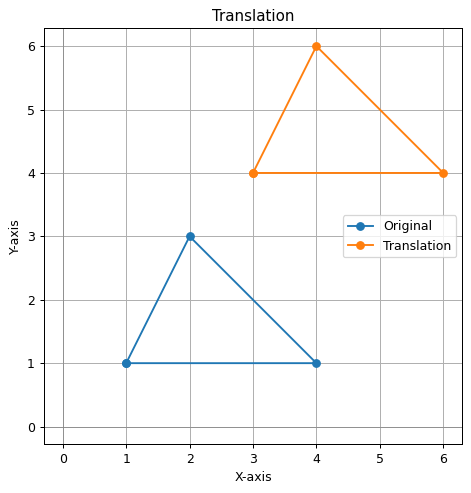

In [5]:
# example with triangle
triangle = [(1, 1), (4, 1), (2, 3)]

translation_matrix = get_translation_matrix(tx=2, ty=3)
# Translate the triangle using the generic apply_transformation function
translated_triangle = apply_transformation(triangle, translation_matrix)

# visualization
draw([triangle, translated_triangle], "Translation")

## Scaling

### Scaling  matrix


In [6]:
def get_scaling_matrix(sx, sy):
    return np.array(
        [
            [sx, 0, 0],
            [0, sy, 0],
            [0, 0, 1],
        ]
    )

### apply scaling and visualize

Transformation Matrix:------
 [[2 0 0]
 [0 3 0]
 [0 0 1]]
Original points:------
 [(1, 1), (4, 1), (2, 3)]
Transformed points:------
 [array([2, 3]), array([8, 3]), array([4, 9])]


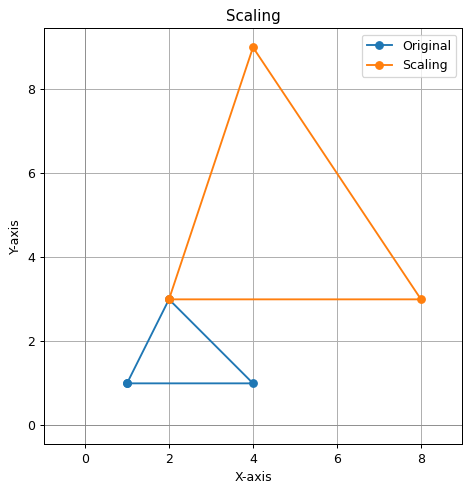

In [7]:
# example with triangle
triangle = [(1, 1), (4, 1), (2, 3)]

scaling_matrix = get_scaling_matrix(2, 3)
# scale the triangle
translated_triangle = apply_transformation(triangle, scaling_matrix)

# scaling visualization
draw([triangle, translated_triangle], "Scaling")

## Rotation

### rotation matrix and rotation factors

In [8]:
def get_rotation_matrix(angle):
    angle_rad = np.radians(angle)
    return np.array(
        [
            [np.cos(angle_rad), -np.sin(angle_rad), 0],
            [np.sin(angle_rad), np.cos(angle_rad), 0],
            [0, 0, 1],
        ]
    )

### apply rotation and visualize

Transformation Matrix:------
 [[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]
Original points:------
 [(1, 1), (4, 1), (2, 3)]
Transformed points:------
 [array([0. , 1.4]), array([2.1, 3.5]), array([-0.7,  3.5])]


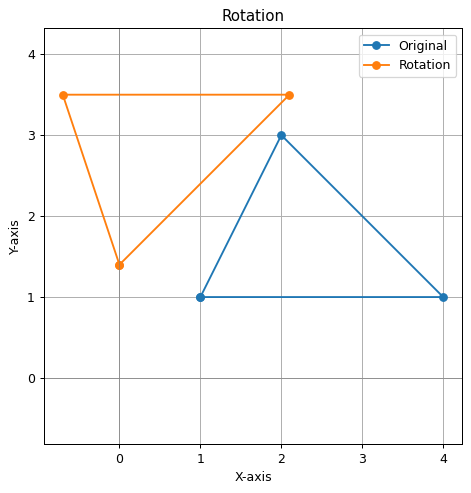

In [9]:
# example with triangle
triangle = [(1, 1), (4, 1), (2, 3)]

rotation_matrix = get_rotation_matrix(45)
# Rotate the triangle
rotated_triangle = apply_transformation(triangle, rotation_matrix)

# Plotting the polygons
draw([triangle, rotated_triangle], "Rotation")

## Complex transformations

(2.3333333333333335, 1.6666666666666667)
Transformation Matrix:------
 [[ 1.          0.         -2.33333333]
 [ 0.          1.         -1.66666667]
 [ 0.          0.          1.        ]]
Original points:------
 [(1, 1), (4, 1), (2, 3)]
Transformed points:------
 [array([-1.3, -0.7]), array([ 1.7, -0.7]), array([-0.3,  1.3])]
Transformation Matrix:------
 [[ 0.8660254 -0.5        0.       ]
 [ 0.5        0.8660254  0.       ]
 [ 0.         0.         1.       ]]
Original points:------
 [array([-1.3, -0.7]), array([ 1.7, -0.7]), array([-0.3,  1.3])]
Transformed points:------
 [array([-0.8, -1.3]), array([1.8, 0.2]), array([-0.9,  1. ])]
Transformation Matrix:------
 [[1.         0.         2.33333333]
 [0.         1.         1.66666667]
 [0.         0.         1.        ]]
Original points:------
 [array([-0.8, -1.3]), array([1.8, 0.2]), array([-0.9,  1. ])]
Transformed points:------
 [array([1.5, 0.4]), array([4.1, 1.9]), array([1.4, 2.7])]


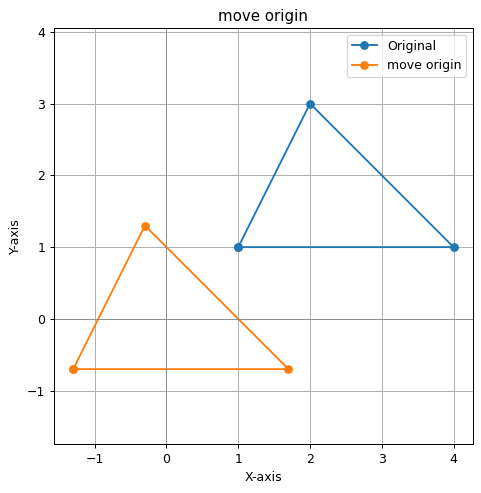

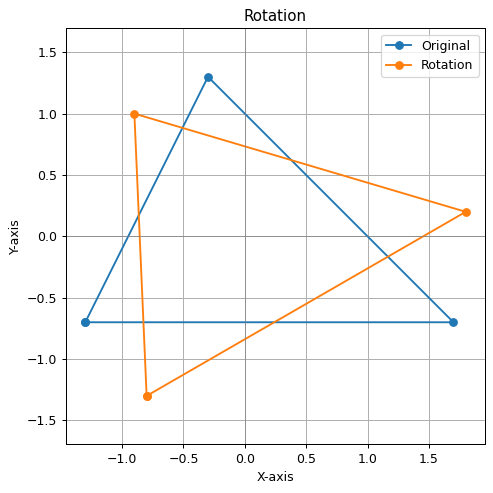

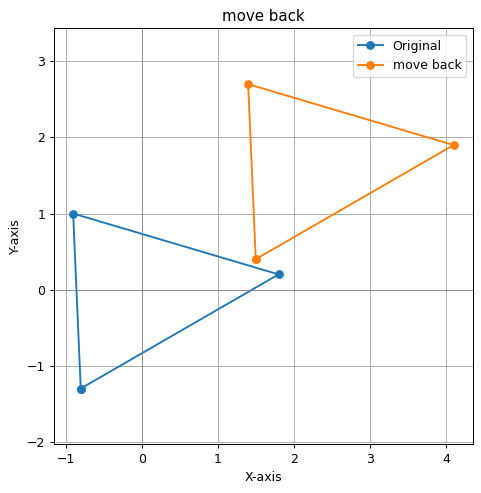

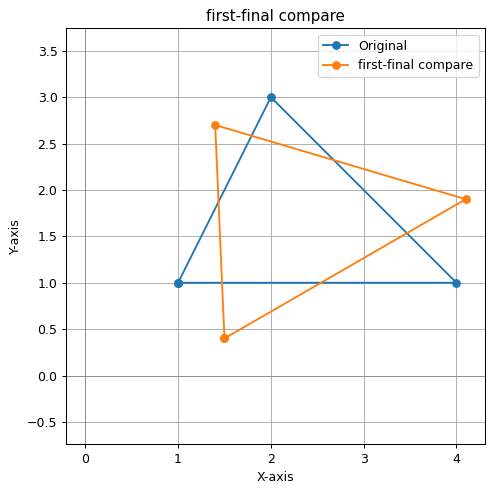

In [17]:
# example with triangle
triangle = [(1, 1), (4, 1), (2, 3)]
center_for_translate = ((1 + 4 + 2) / 3, (1 + 1 + 3) / 3)
print(center_for_translate)


t1 = apply_transformation(
    triangle,
    get_translation_matrix(-center_for_translate[0], -center_for_translate[1]),
)
rotated_triangle = apply_transformation(
    t1,
    get_rotation_matrix(angle=30),
)
final = apply_transformation(
    rotated_triangle,
    get_translation_matrix(center_for_translate[0], center_for_translate[1]),
)

# Plotting the polygons
draw([triangle, t1], "move origin")
draw([t1, rotated_triangle], "Rotation")
draw([rotated_triangle, final], "move back")
draw([triangle, final], "first-final compare")

(2.5, 1.0)
Transformation Matrix:------
 [[ 1.   0.  -2.5]
 [ 0.   1.  -1. ]
 [ 0.   0.   1. ]]
Original points:------
 [(1, 1), (4, 1)]
Transformed points:------
 [array([-1.5,  0. ]), array([1.5, 0. ])]
Transformation Matrix:------
 [[ 0.8660254 -0.5        0.       ]
 [ 0.5        0.8660254  0.       ]
 [ 0.         0.         1.       ]]
Original points:------
 [array([-1.5,  0. ]), array([1.5, 0. ])]
Transformed points:------
 [array([-1.3, -0.7]), array([1.3, 0.7])]
Transformation Matrix:------
 [[1.  0.  2.5]
 [0.  1.  1. ]
 [0.  0.  1. ]]
Original points:------
 [array([-1.3, -0.7]), array([1.3, 0.7])]
Transformed points:------
 [array([1.2, 0.3]), array([3.8, 1.7])]


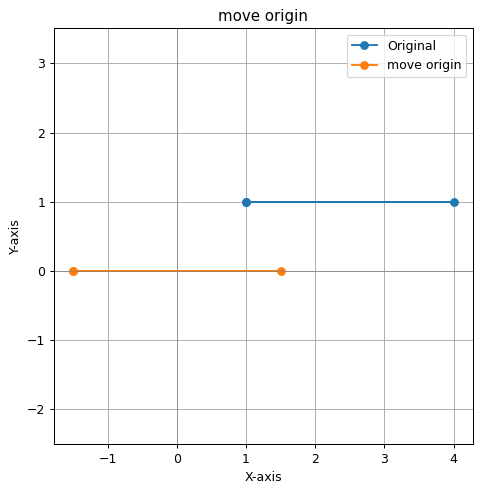

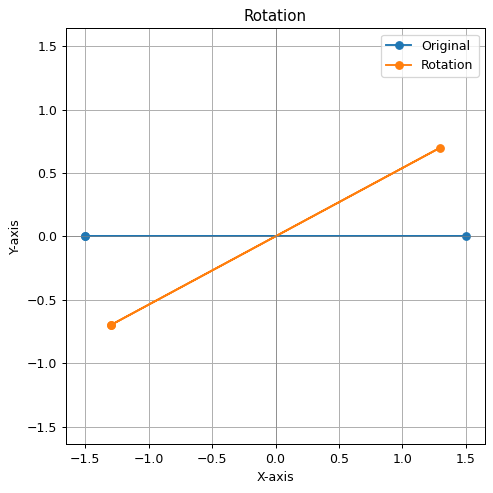

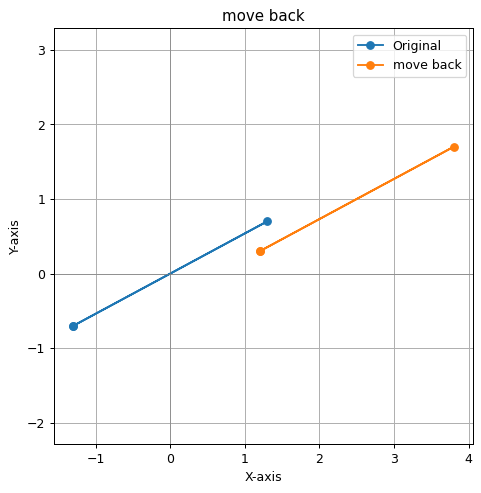

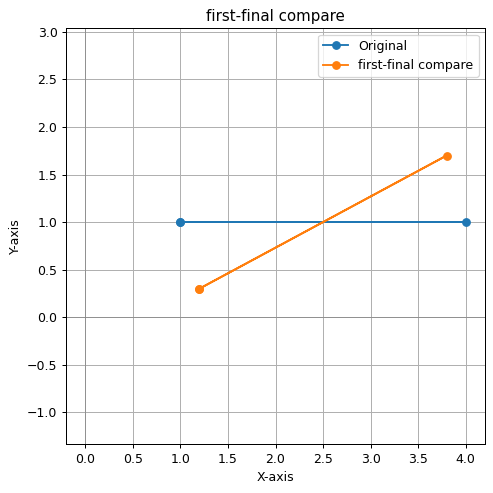

In [18]:
# example with triangle
triangle = [(1, 1), (4, 1)]
center_for_translate = ((1 + 4) / 2, (1 + 1) / 2)
print(center_for_translate)


t1 = apply_transformation(
    triangle,
    get_translation_matrix(-center_for_translate[0], -center_for_translate[1]),
)
rotated_triangle = apply_transformation(
    t1,
    get_rotation_matrix(angle=30),
)
final = apply_transformation(
    rotated_triangle,
    get_translation_matrix(center_for_translate[0], center_for_translate[1]),
)

# Plotting the polygons
draw([triangle, t1], "move origin")
draw([t1, rotated_triangle], "Rotation")
draw([rotated_triangle, final], "move back")
draw([triangle, final], "first-final compare")

(2.5, 1.0)
Transformation Matrix:------
 [[ 0.8660254 -0.5        0.       ]
 [ 0.5        0.8660254  0.       ]
 [ 0.         0.         1.       ]]
Original points:------
 [(1, 1), (4, 1)]
Transformed points:------
 [array([0.4, 1.4]), array([3. , 2.9])]


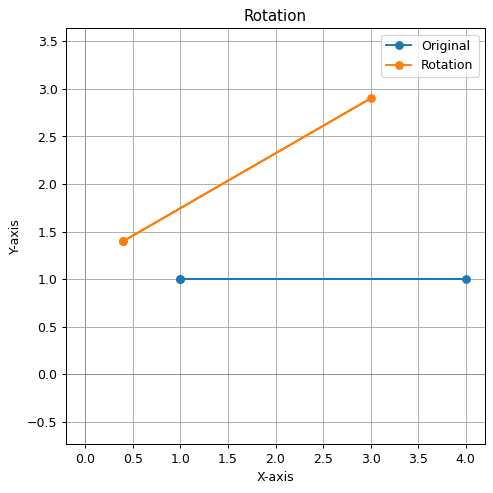

In [19]:
# example with triangle
t1 = [(1, 1), (4, 1)]
center_for_translate = ((1 + 4) / 2, (1 + 1) / 2)
print(center_for_translate)


rotated_triangle = apply_transformation(
    t1,
    get_rotation_matrix(angle=30),
)


# Plotting the polygons
draw([t1, rotated_triangle], "Rotation")